In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, GRU

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
def evaluate_model(train_data, test_data, train_size, test_size, split_ratio):
    #6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
    time_step = 100
    X_train, y_train = create_dataset(train_data, time_step)
    X_val, yval = create_dataset(val_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)

    # 7. Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
    # 8. Define GRU Model
    model = Sequential()
    model.add(GRU(64, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 9. Fit mô hình với dữ liệu train
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
    
   # 10. Dự báo dữ liệu test, val
    train_predict=model.predict(X_train)
    y_pred=model.predict(X_test)

    # 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
    train_predict=scaler.inverse_transform(train_predict)
    y_pred=scaler.inverse_transform(y_pred)

    # 14.Vẽ hình
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))
    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))
    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))
    # prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
    # plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
    plt.title(f'{split_ratio} split - Actual vs Predicted')
    plt.legend(['Train','Test','Predict'])    
    plt.show()

    # Calculate RMSE for testing set
    test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))

    # Calculate MAPE for testing set
    test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

    # Calculate MSLE for testing set
    test_msle = np.mean((np.log1p(ytest) - np.log1p(y_pred)) ** 2)

    # Print evaluation metrics
    print('Testing RMSE:', test_rmse)
    print('Testing MAPE:', test_mape)
    print('Testing MSLE:', test_msle)

Epoch 1/100


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0911 - val_loss: 0.0111
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0154 - val_loss: 1.0975e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0064 - val_loss: 3.5848e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0025 - val_loss: 6.7229e-05
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0010 - val_loss: 7.9353e-05
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0011 - val_loss: 7.7439e-05
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0015 - val_loss: 6.6587e-05
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 7.9439e-04 - val_loss: 6.6750e-05
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0011 - val_loss: 6.9885e-05
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0012 - val_loss: 6.5830e-05
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 8.7301e-04 - val_loss: 6.5498e-05
Epoch 12/100
15/

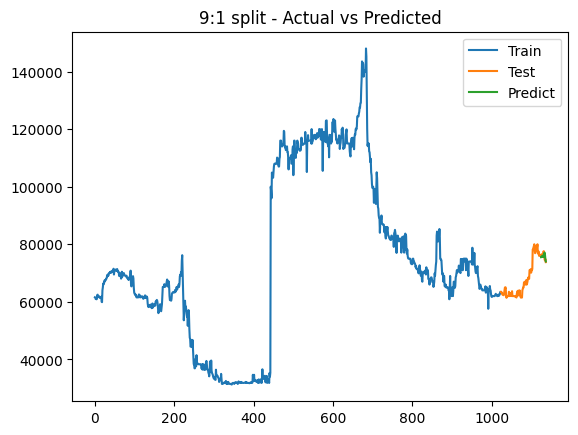

Testing RMSE: 75767.73154758693
Testing MAPE: 19753800.716947112
Testing MSLE: 119.04125897203242


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 0.1154 - val_loss: 0.0131
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0195 - val_loss: 0.0022
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0072 - val_loss: 2.8178e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0037 - val_loss: 8.2688e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0017 - val_loss: 2.8018e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0017 - val_loss: 1.4042e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0016 - val_loss: 2.1586e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0012 - val_loss: 1.3627e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0013 - val_loss: 1.4120e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0013 - val_loss: 1.4888e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0016 - val_loss: 1.3307e-04
Epoch

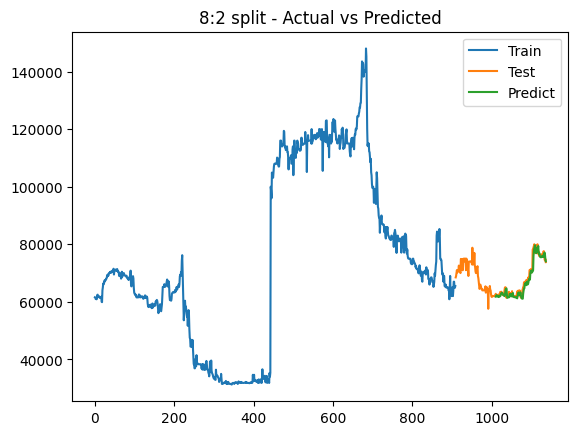

Testing RMSE: 67270.05476282688
Testing MAPE: 22216561.142408576
Testing MSLE: 117.49400664119902


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - loss: 0.0787 - val_loss: 0.0068
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0126 - val_loss: 0.0049
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0056 - val_loss: 3.2652e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0035 - val_loss: 6.2177e-04
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0017 - val_loss: 2.1406e-04
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0015 - val_loss: 2.3581e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0010 - val_loss: 1.9800e-04
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 9.7471e-04 - val_loss: 2.0290e-04
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 9.3693e-04 - val_loss: 1.9330e-04
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0011 - val_loss: 1.9174e-04
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 9.0454e-04 - val_loss: 1.90

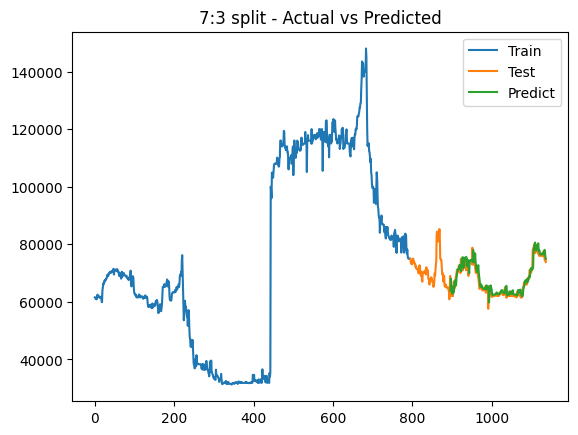

Testing RMSE: 68588.56743724136
Testing MAPE: 22310363.745201718
Testing MSLE: 117.89251974720683


In [21]:
# Load data
df = pd.read_csv('../../Dataset/DP3 Historical Data.csv', parse_dates=['Date'])
df1 = df1=df.reset_index()['Price']
df1 = df1.str.replace(',', '').astype(float)

# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]

# 9:1 split
evaluate_model(train_data, test_data, train_size, test_size, "9:1")

# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing
val_size = len(df1) - train_size - test_size  # Remaining for validation

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 8:2 split
evaluate_model(train_data, test_data,  train_size, test_size, "8:2")

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing
val_size = len(df1) - train_size - test_size  # Remaining for validation

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]

# 7:3 split
evaluate_model(train_data, test_data,  train_size, test_size, "7:3")

Epoch 1/100


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0356 - val_loss: 0.0245
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 6.7470e-04 - val_loss: 3.4427e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 4.3036e-04 - val_loss: 9.3438e-05
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 3.4413e-04 - val_loss: 4.7590e-05
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 3.2889e-04 - val_loss: 7.5411e-05
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 2.8527e-04 - val_loss: 5.4685e-05
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 3.0431e-04 - val_loss: 7.9300e-05
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 3.1159e-04 - val_loss: 5.9385e-05
Epoch 1

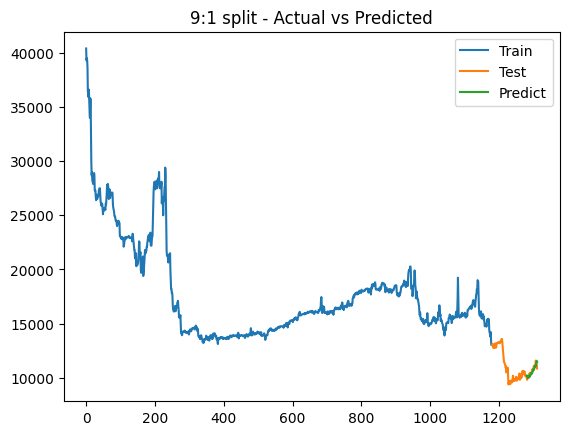

Testing RMSE: 10593.406469378573
Testing MAPE: 32219283.42718602
Testing MSLE: 85.1589583121212
Epoch 1/100


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0450 - val_loss: 0.0300
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0086 - val_loss: 0.0070
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0035 - val_loss: 0.0068
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 5.4306e-04 - val_loss: 7.6612e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 4.0674e-04 - val_loss: 3.1967e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.0754e-04 - val_loss: 1.6711e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 3.3490e-04 - val_loss: 1.7703e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.8700e-04 - val_loss: 2.0789e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.9524e-04 - val_loss: 1.5073e-04
Epoch 12/100
15/

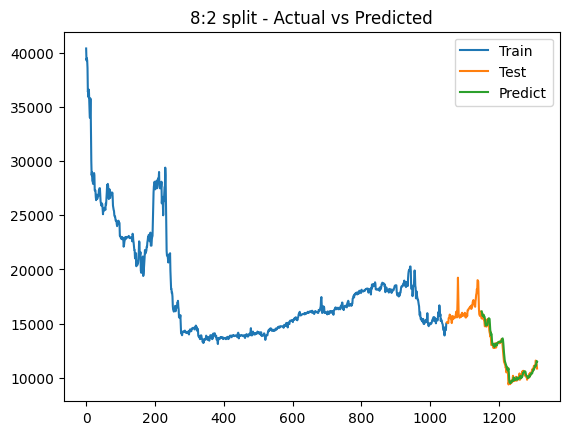

Testing RMSE: 12037.085994242343
Testing MAPE: inf
Testing MSLE: 86.42838338181181
Epoch 1/100


C:\Users\khaqt\AppData\Local\Temp\ipykernel_10944\3313747573.py:45: RuntimeWarning: divide by zero encountered in divide
  test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0452 - val_loss: 0.0152
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0079 - val_loss: 0.0047
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 6.9932e-04 - val_loss: 6.8732e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 4.4596e-04 - val_loss: 3.3001e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.7642e-04 - val_loss: 2.7569e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 3.4360e-04 - val_loss: 2.6875e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.9991e-04 - val_loss: 3.0709e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 2.1905e-04 - val_loss: 2.7315e-04
Epoch 12/100
13

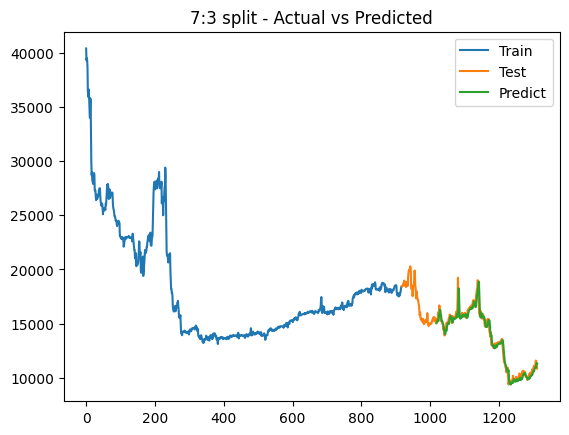

Testing RMSE: 13818.067398850557
Testing MAPE: inf
Testing MSLE: 87.8354568747057


C:\Users\khaqt\AppData\Local\Temp\ipykernel_10944\3313747573.py:45: RuntimeWarning: divide by zero encountered in divide
  test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100


In [22]:
# Load data
df = pd.read_csv('../../Dataset/DHT Historical Data.csv', parse_dates=['Date'])
df1 = df1=df.reset_index()['Price']
df1 = df1.str.replace(',', '').astype(float)

# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]

# 9:1 split
evaluate_model(train_data, test_data,  train_size, test_size, "9:1")

# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing
val_size = len(df1) - train_size - test_size  # Remaining for validation

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 8:2 split
evaluate_model(train_data, test_data,  train_size, test_size, "8:2")

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing
val_size = len(df1) - train_size - test_size  # Remaining for validation

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]

# 7:3 split
evaluate_model(train_data, test_data,  train_size, test_size, "7:3")

c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.1365 - val_loss: 0.0090
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0221 - val_loss: 0.0048
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0072 - val_loss: 6.3370e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0024 - val_loss: 3.2618e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0013 - val_loss: 2.4621e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0014 - val_loss: 2.0797e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0012 - val_loss: 1.8482e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0013 - val_loss: 1.9795e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0014 - val_loss: 1.8816e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 8.3898e-04 - val_loss: 2.6235e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0012 - val_loss: 1.7482e-04
E

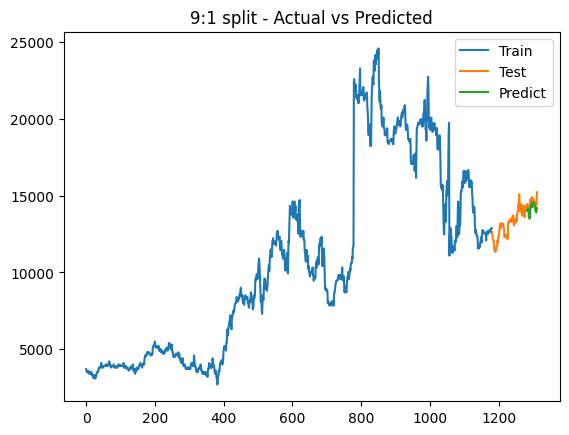

Testing RMSE: 14165.989199791748
Testing MAPE: 2642183.9271454406
Testing MSLE: 83.33760535650072


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.2343 - val_loss: 0.0054
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0337 - val_loss: 0.0011
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0159 - val_loss: 0.0014
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0057 - val_loss: 3.6410e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0018 - val_loss: 5.0117e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0014 - val_loss: 4.6965e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0022 - val_loss: 4.5071e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0014 - val_loss: 2.7282e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0013 - val_loss: 4.0925e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0012 - val_loss: 4.2198e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0017 - val_loss: 2.7408e-04
Epoch 12/100

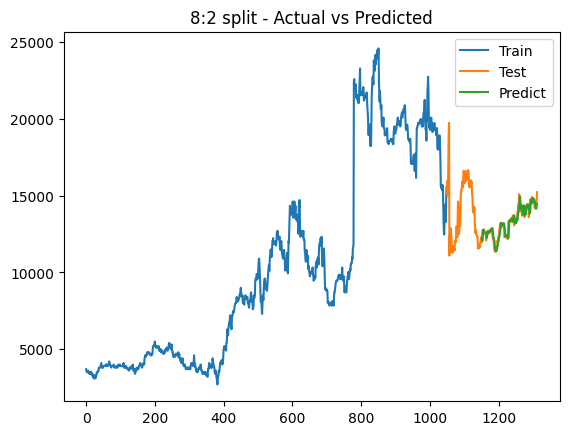

Testing RMSE: 13295.37788272956
Testing MAPE: 2769349.6456102
Testing MSLE: 82.76186247850283
Epoch 1/100


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - loss: 0.0873 - val_loss: 0.0029
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0153 - val_loss: 0.0020
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 9.8573e-04 - val_loss: 0.0014
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 7.6491e-04 - val_loss: 0.0013
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 7.2993e-04 - val_loss: 0.0013
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/s

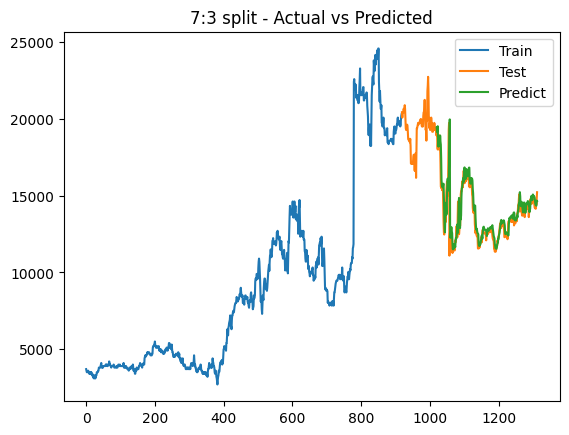

Testing RMSE: 14152.78834427998
Testing MAPE: 2824067.221656476
Testing MSLE: 83.42423053705312


In [23]:
# Load data
df = pd.read_csv('../../Dataset/AMV Historical Data.csv', parse_dates=['Date'])
df1 = df1=df.reset_index()['Price']
df1 = df1.str.replace(',', '').astype(float)

# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]

# 9:1 split
evaluate_model(train_data, test_data,  train_size, test_size, "9:1")

# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing
val_size = len(df1) - train_size - test_size  # Remaining for validation

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 8:2 split
evaluate_model(train_data, test_data,  train_size, test_size, "8:2")

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size  # Remaining for testing
val_size = len(df1) - train_size - test_size  # Remaining for validation

# Split the data accordingly
train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]

# 7:3 split
evaluate_model(train_data, test_data,  train_size, test_size, "7:3")